In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 99.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [3]:
!pip install xgboost==2.1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [4]:
import sklearn 
import xgboost
print(sklearn.__version__)
print(xgboost.__version__)


1.6.1
2.1.4


In [5]:
import pandas as pd
from tqdm import tqdm  # optional: for progress bar

origin_comp_df = pd.read_csv("/kaggle/input/merge-comp-2021/ecg-comp-2021-signals-features.csv")

origin_comp_df.iloc[0]

record_name                        training/ningbo/g34/JS44560
Duree_QRS_ms_mean                                   166.117647
Duree_QRS_ms_std                                     33.320193
Duree_QRS_ms_min                                         140.0
Duree_QRS_ms_max                                         272.0
                                         ...                  
std_Intervalle_RR_ms                                  6.961801
Age                                                       40.0
Sex                                                       Male
Dx                      ['164934002', '427084000', '55827005']
Class                                                        2
Name: 0, Length: 100, dtype: object

In [6]:
origin_comp_df.columns

Index(['record_name', 'Duree_QRS_ms_mean', 'Duree_QRS_ms_std',
       'Duree_QRS_ms_min', 'Duree_QRS_ms_max', 'Duree_P_ms_mean',
       'Duree_P_ms_std', 'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean',
       'Duree_T_ms_std', 'Duree_T_ms_min', 'Duree_T_ms_max',
       'Intervalle_QT_ms_mean', 'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min',
       'Intervalle_QT_ms_max', 'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std',
       'Intervalle_PR_ms_min', 'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean',
       'Intervalle_ST_ms_std', 'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max',
       'Amplitude_P_mean', 'Amplitude_P_std', 'Amplitude_P_min',
       'Amplitude_P_max', 'Amplitude_Q_mean', 'Amplitude_Q_std',
       'Amplitude_Q_min', 'Amplitude_Q_max', 'Amplitude_R_mean',
       'Amplitude_R_std', 'Amplitude_R_min', 'Amplitude_R_max',
       'Amplitude_S_mean', 'Amplitude_S_std', 'Amplitude_S_min',
       'Amplitude_S_max', 'Amplitude_T_mean', 'Amplitude_T_std',
       'Amplitude_T_mi

In [7]:
origin_comp_df["Class"].value_counts()

Class
2    40704
0    28967
1    18559
Name: count, dtype: int64

# MIT-BIH norm

In [8]:
origin_mitbih_df = pd.read_csv("/kaggle/input/merge-norm-mitbih/norm-mit-signals-features.csv") 

In [9]:
origin_mitbih_df["Class"].value_counts()


Class
0    20298
Name: count, dtype: int64

# ecg arr

In [10]:
origin_ecgarr_df = pd.read_csv("/kaggle/input/merge-ecg-arrhythmia/ecg-arr-signals-features.csv") 

origin_ecgarr_df["Class"].value_counts()


Class
2    8342
1    6810
0    3301
Name: count, dtype: int64

# challenge 2017


In [11]:
origin_ch2017_df = pd.read_csv("/kaggle/input/fork-of-merge-ecg-arrhythmia/challenge-2017-signals-features.csv") 
len(origin_ch2017_df)


8526

In [12]:
origin_ch2017_df['Class'] = origin_ch2017_df['type'].apply(lambda x: 0 if x == 'N' else 2)
origin_ch2017_df = origin_ch2017_df.drop(columns=['type'])

In [13]:
origin_ch2017_df["Class"].value_counts()

Class
0    5075
2    3451
Name: count, dtype: int64

# full data

In [14]:
arr3 = [origin_comp_df,origin_mitbih_df]
#arr3 = [origin_comp_df]

sign_df = pd.concat(arr3, ignore_index=True)

In [15]:
arr4 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df,origin_ch2017_df]
#arr3 = [origin_comp_df]

sign_df2 = pd.concat(arr4, ignore_index=True)

In [16]:
# check null except age and sex
mask = sign_df2.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = sign_df2[mask]
df_with_nulls

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,record_name,Duree_QRS_ms_mean,Duree_QRS_ms_std,Duree_QRS_ms_min,Duree_QRS_ms_max,Duree_P_ms_mean,Duree_P_ms_std,Duree_P_ms_min,Duree_P_ms_max,Duree_T_ms_mean,...,percent_T_inversion,QRS_prolonged_ratio,QT_prolonged_ratio,PVC_ratio,num_beats,std_Intervalle_RR_ms,Age,Sex,Dx,Class
60,training/ningbo/g34/JS44620,360.000000,NaN,360.0,360.0,96.000000,NaN,96.0,96.0,340.000000,...,1.000000,1.0,1.000000,0.000000,1,NaN,23.0,Male,['427084000'],2
908,training/ningbo/g35/JS45471,258.000000,268.700577,68.0,448.0,292.000000,118.793939,208.0,376.0,424.000000,...,1.000000,0.5,0.500000,0.000000,2,NaN,50.0,Female,['164896001'],2
981,training/ningbo/g35/JS45545,142.000000,82.024387,84.0,200.0,224.000000,0.000000,224.0,224.0,174.000000,...,0.000000,0.5,0.500000,0.000000,2,NaN,37.0,Male,['425856008'],2
1215,training/ningbo/g4/JS13873,240.000000,NaN,240.0,240.0,296.000000,NaN,296.0,296.0,176.000000,...,1.000000,1.0,1.000000,0.000000,1,NaN,67.0,Female,"['164890007', '39732003']",2
1672,training/ningbo/g4/JS14330,336.000000,NaN,336.0,336.0,0.000000,NaN,0.0,0.0,280.000000,...,1.000000,1.0,1.000000,0.000000,1,NaN,80.0,Male,"['164890007', '10370003']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135502,A08/A08524,183.000000,26.239591,148.0,260.0,90.875000,121.781335,0.0,472.0,174.375000,...,0.500000,1.0,0.468750,0.000000,32,224.230757,NaN,NaN,NaN,0
135503,A08/A08525,236.666667,28.978265,136.0,296.0,48.476190,62.345707,0.0,224.0,189.047619,...,0.904762,1.0,0.166667,0.142857,42,122.062599,NaN,NaN,NaN,2
135504,A08/A08526,187.047619,34.801845,140.0,252.0,155.238095,59.298258,80.0,368.0,190.761905,...,0.047619,1.0,0.190476,0.000000,42,63.126509,NaN,NaN,NaN,0
135505,A08/A08527,242.956522,63.969075,140.0,428.0,118.869565,74.755485,0.0,248.0,127.304348,...,0.282609,1.0,0.217391,0.021739,46,148.400931,NaN,NaN,NaN,0


In [17]:
sign_df2["Class"].value_counts()

Class
0    57641
2    52497
1    25369
Name: count, dtype: int64

# training

In [18]:

df_full = sign_df2
df_full["Class"].value_counts()


Class
0    57641
2    52497
1    25369
Name: count, dtype: int64

In [19]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]

In [20]:
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()

Class
0    52488
2    49002
1    25367
Name: count, dtype: int64

In [21]:
df_full['Class'] = df_full['Class'].replace(2, 1)
df_balanced = df_full

df_full["Class"].value_counts()

Class
1    74369
0    52488
Name: count, dtype: int64

In [22]:
from sklearn.utils import resample
'''
df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
'''
# balancing

"\ndf = df_full\n# Separate the two classes\ndf_major = df[df['Class'] == 1]\ndf_minor = df[df['Class'] == 0]\n\n# Downsample the majority class\ndf_major_downsampled = resample(df_major,\n                                replace=False,     # without replacement\n                                n_samples=len(df_minor),\n                                random_state=42)   # reproducibility\n\n# Combine balanced dataset\ndf_balanced = pd.concat([df_major_downsampled, df_minor])\ndf_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)\n"

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    74369
0    52488
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'A

In [24]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9077
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89     10564
           1       0.90      0.95      0.92     14808

    accuracy                           0.91     25372
   macro avg       0.91      0.90      0.90     25372
weighted avg       0.91      0.91      0.91     25372

[[ 9022  1542]
 [  799 14009]]


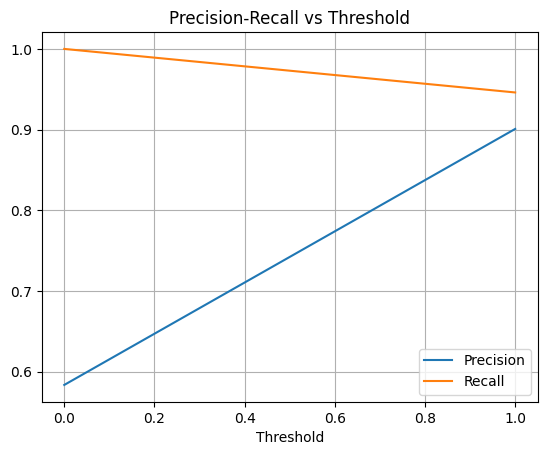

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


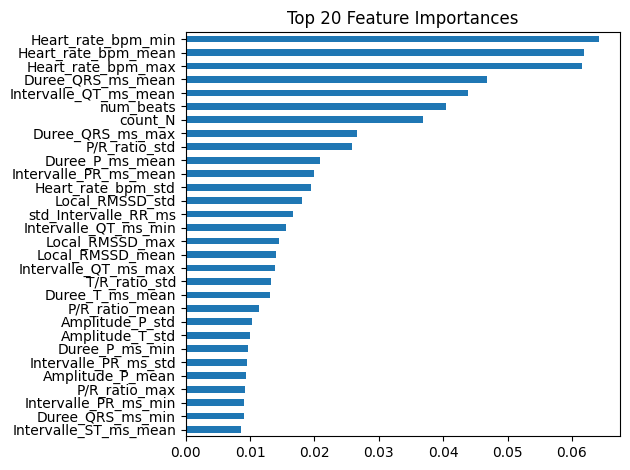

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


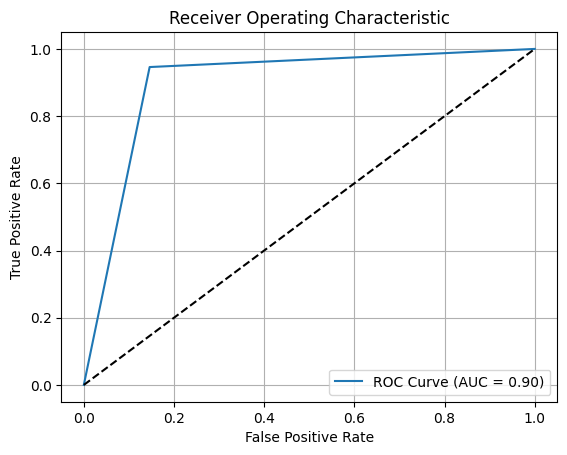

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


In [28]:
import joblib

# Save model
joblib.dump(rf_clf, 'normal_vs_abnormal_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# SB

In [29]:
df = sign_df
df = df.dropna()
df = df[df['Class'] != 0].reset_index(drop=True)
df['Class'] = df['Class'].replace(1, 0)
df['Class'] = df['Class'].replace(2, 1)


print(df['Class'].value_counts())
df_balanced = df

Class
1    40526
0    18551
Name: count, dtype: int64


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column
y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    40526
0    18551
Name: count, dtype: int64


In [31]:

# Initialize a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9719
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3671
           1       0.98      0.98      0.98      8145

    accuracy                           0.97     11816
   macro avg       0.97      0.97      0.97     11816
weighted avg       0.97      0.97      0.97     11816

[[3527  144]
 [ 188 7957]]


In [32]:
import joblib

# Save model
joblib.dump(rf_clf, 'sb_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# 3 classes

In [33]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = sign_df
df = df.dropna()
df_balanced = df
# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  
y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)



Class
2    40526
0    28881
1    18551
Name: count, dtype: int64


In [34]:

# Initialize a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8419
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.77      5756
           1       0.83      0.95      0.88      3711
           2       0.87      0.87      0.87      8125

    accuracy                           0.84     17592
   macro avg       0.84      0.85      0.84     17592
weighted avg       0.84      0.84      0.84     17592



# MLP

In [35]:

df_full = sign_df
df_full["Class"].value_counts()

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]

In [36]:
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()

Class
0    49187
2    40670
1    18557
Name: count, dtype: int64

In [37]:
df_full['Class'] = df_full['Class'].replace(2, 1)
df_balanced = df_full

df_full["Class"].value_counts()

Class
1    59227
0    49187
Name: count, dtype: int64

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have df_signal_features with features and 'Class' column
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column
y = df_full['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train
mlp.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)

In [39]:

# Evaluate
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8316  1521]
 [ 1200 10646]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9837
           1       0.87      0.90      0.89     11846

    accuracy                           0.87     21683
   macro avg       0.87      0.87      0.87     21683
weighted avg       0.87      0.87      0.87     21683



In [40]:

joblib.dump(mlp, 'mlp_normal_vs_abnormal_model.pkl')
print("Model saved successfully!")

Model saved successfully!
